### Student Activity: Market Analysis

This program reads daily stock data from a CSV and plots three different charts for three different analyses: pie (sector frequency distribution), bar (top 20 market cap companies), and scatter (price vs. earnings relationship).

In [1]:
# Import libraries and dependencies


### Read CSV in as DataFrame

In [32]:
import pandas as pd
from pathlib import Path
%matplotlib inline
# Set the path
filepath = Path("../Resources/sp500_companies.csv")

# Read in the CSV as a DataFrame
df = pd.read_csv(filepath)
df

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,12915021000,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,27003303098,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,24454698119,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,10670678640,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


### Calculate Sector Counts

In [4]:
# Count the frequency of each sector from the list of companies
df_count = df['Sector'].value_counts()
df_count

Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64

### Plot Sector Counts

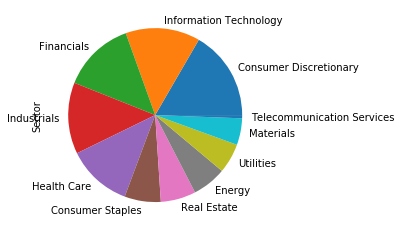

In [10]:
# Plot a pie chart from the distribution of company sectors
df_count.plot(kind='pie')

### Filter By Top 20 Market Cap Companies

In [15]:
# Grab the `Symbol` and `Market Cap` columns
top20 = df.loc[:, ['Symbol', 'Market Cap']]
# Set the 'Symbol' as the index
top20.set_index(top20['Symbol'], inplace=True)

# Drop the extra 'Symbol' column
tp20 = top20.drop(columns=['Symbol'])
tp20

# Filter down to 20 companies with the largest market caps
top20_final = tp20.nlargest(20, 'Market Cap')

# Display the DataFrame
top20_final

Market Cap    int64
dtype: object

### Plot Top 20 Market Cap Companies

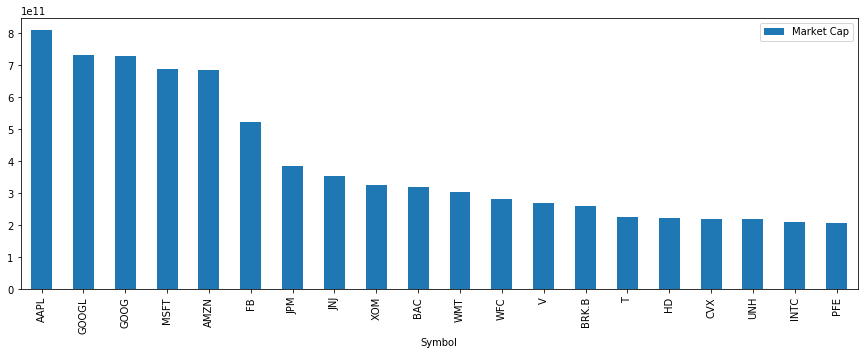

In [23]:
# Plot a bar chart of the top 20 market cap companies
top20_final.plot(kind='bar', figsize=(15,5))

### Plot Relationship Between Price and Earnings/Share

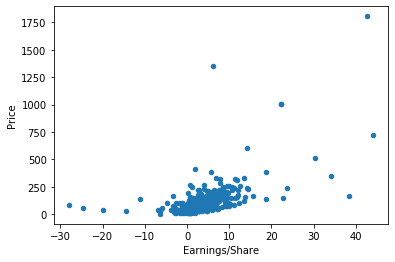

In [47]:
# Plot a scatter plot to display the relationship between price vs. earnings/share
df_eps = df.loc[:, ['Price','Earnings/Share']]
df_eps.set_index(df_eps['Price'], inplace=True)
df_eps.drop(columns=['Price'])
df_eps.plot.scatter(y='Price', x='Earnings/Share')